In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense


from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

import pickle

# Load prepared data

In [2]:
dir_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/"
# dir_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
save_path = dir_path+"data/raw/"
img_path =  dir_path+"data/processed/"
model_path = dir_path+"models/"

## fmap mean all experiments

In [3]:
file_mean = save_path+"fmap_mean_erode.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [4]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5046267,35,5,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
5046268,35,5,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
5046269,35,5,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
5046270,35,5,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5046272 entries, 0 to 5046271
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 423.5 MB


# Split data

## Data 1. fmap mean all experiments

In [6]:
df1_train = df[~((df['exp']==36) & ((df['mini_exp']==5) | (df['mini_exp']==6)))]
df1_val =  df[(df['exp']==36) & (df['mini_exp']==5)]
df1_test =  df[(df['exp']==36) & (df['mini_exp']==6)]

In [7]:
print(df1_train.shape)
print(df1_val.shape)
print(df1_test.shape)

(4685824, 11)
(180224, 11)
(180224, 11)


In [8]:
X1_train = df1_train.iloc[:, 5:-1].values 
y1_train = df1_train['theory'].values

X1_test = df1_val.iloc[:, 5:-1].values 
y1_test = df1_val['theory'].values

X1_pred = df1_test.iloc[:, 5:-1].values 
y1_pred = df1_val['theory'].values

In [9]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)
print(X1_pred.shape)
print(y1_pred.shape)

(4685824, 5)
(4685824,)
(180224, 5)
(180224,)
(180224, 5)
(180224,)


## Data2: One experiment

In [10]:
df_train = df[(df['exp']==36) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==36) & (df['mini_exp']==6)]

## Data4: None zero

In [11]:
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0) & (df['mean3']!=0.0) & (df['mean4']!=0.0)]

In [12]:
df_nonzero

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
34920,36,1,8,33,40,17.758072,3.100749,-27.108955,-54.541569,-65.580933,6.323732
34921,36,1,8,33,41,-171.797119,-187.157349,-216.839035,-243.115356,-255.319305,5.692159
34922,36,1,8,33,42,-384.395447,-400.023895,-428.779266,-454.553436,-467.434479,5.156662
34923,36,1,8,33,43,-597.038513,-613.454895,-641.396118,-666.766907,-679.730591,4.694756
34959,36,1,8,34,15,-1179.840454,-1197.678955,-1222.885254,-1246.201660,-1258.513672,3.883065
...,...,...,...,...,...,...,...,...,...,...,...
5003809,35,5,33,40,33,-233.451859,-219.373581,-219.398911,-222.292938,-216.633850,20.445215
5003810,35,5,33,40,34,-249.901581,-236.660583,-236.275848,-238.081451,-233.357391,15.309294
5003811,35,5,33,40,35,-230.639755,-218.042419,-217.110458,-218.660629,-214.294983,12.231406
5003812,35,5,33,40,36,-186.973434,-174.493347,-173.302063,-174.678192,-170.903381,10.196120


In [13]:
df4_train = df_nonzero[~((df_nonzero['exp']==36) & ((df_nonzero['mini_exp']==6) | (df_nonzero['mini_exp']==5)))]
df4_test =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==5)]
df4_pred =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==6)]

In [14]:
X4_train = df4_train.iloc[:, 5:-1].values
y4_train = df4_train['theory'].values

X4_test = df4_test.iloc[:, 5:-1].values
y4_test = df4_test['theory'].values

X4_pred = df4_pred.iloc[:, 5:-1].values
y4_pred = df4_pred['theory'].values

In [25]:
# X = df_nonzero.iloc[:, 5:-1].values
# y = df_nonzero['theory'].values

# X4_train, X4_test, y4_train, y4_test = train_test_split(
#     X, y, test_size=0.3, random_state=0)

In [15]:
# print(X.shape)
# print(y.shape)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)
print(X4_pred.shape)
print(y4_pred.shape)

(694168, 5)
(694168,)
(27092, 5)
(27092,)
(27093, 5)
(27093,)


# Include zero 32 to 38

In [53]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [55]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=shape)) 
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adamax', loss='mse', metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=[X_test, y_test])

Epoch 1/100
146432/146432 [==============================] - 151s 1ms/step - loss: 36.2151 - accuracy: 0.6203 - val_loss: 9.9205 - val_accuracy: 0.8495
Epoch 2/100
146432/146432 [==============================] - 144s 983us/step - loss: 5.7961 - accuracy: 0.8515 - val_loss: 6.5620 - val_accuracy: 0.8495
Epoch 3/100
146432/146432 [==============================] - 1914s 13ms/step - loss: 5.0681 - accuracy: 0.8515 - val_loss: 5.7479 - val_accuracy: 0.8496
Epoch 4/100
146432/146432 [==============================] - 1974s 13ms/step - loss: 4.8988 - accuracy: 0.8515 - val_loss: 4.3896 - val_accuracy: 0.8496
Epoch 5/100
146188/146432 [============================>.] - ETA: 1s - loss: 4.8279 - accuracy: 0.8515

In [ ]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
np.corrcoef(test_pred.flatten(), y_test)

In [ ]:
model.summary()

In [ ]:
history.history

In [ ]:
file = img_path+'model_32to38_erode.sav'
pickle.dump(model, open(file, 'wb'))

In [21]:
load_model = pickle.load(open(file, 'rb'))
result = load_model.evaluate(X_test, y_test)
print(result)

1063/1063 [==============================] - 1s 842us/step - loss: 56.8737 - accuracy: 8.8204e-04
[56.87367630004883, 0.0008820416405797005]


## Plot

### Loss function (MSE)

In [ ]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

In [ ]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

In [ ]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [ ]:
test_pred = model.predict(X1_pred)

In [ ]:
df_test

In [ ]:
df_test['predict'] = test_pred

In [ ]:
np.savetxt(img_path+"nn_32to38_erode.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
df_test

# Nonzero 32 to 38

In [16]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [17]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(5, activation='relu', input_shape=shape)) 
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse', metrics=["accuracy"])

2022-11-28 10:36:54.463240: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=[X_test, y_test])

Epoch 1/1000
10847/10847 [==============================] - 11s 987us/step - loss: 133.6451 - accuracy: 1.5126e-04 - val_loss: 57.3660 - val_accuracy: 3.6911e-04
Epoch 2/1000
10847/10847 [==============================] - 11s 1ms/step - loss: 39.0951 - accuracy: 3.0108e-04 - val_loss: 48.1437 - val_accuracy: 9.5969e-04
Epoch 3/1000
10847/10847 [==============================] - 11s 1ms/step - loss: 33.2156 - accuracy: 5.7335e-04 - val_loss: 39.2433 - val_accuracy: 0.0010
Epoch 4/1000
10847/10847 [==============================] - 11s 1ms/step - loss: 31.5992 - accuracy: 6.3529e-04 - val_loss: 38.5932 - val_accuracy: 0.0013
Epoch 5/1000
10847/10847 [==============================] - 11s 1ms/step - loss: 31.0795 - accuracy: 6.5258e-04 - val_loss: 34.6038 - val_accuracy: 0.0010
Epoch 6/1000
10847/10847 [==============================] - 11s 986us/step - loss: 31.1943 - accuracy: 6.3385e-04 - val_loss: 39.4543 - val_accuracy: 0.0016
Epoch 7/1000
10847/10847 [==============================]

10847/10847 [==============================] - 10s 919us/step - loss: 28.3399 - accuracy: 3.9040e-04 - val_loss: 22.8478 - val_accuracy: 7.7514e-04
Epoch 53/1000
10847/10847 [==============================] - 10s 919us/step - loss: 28.3362 - accuracy: 3.9616e-04 - val_loss: 23.8701 - val_accuracy: 0.0000e+00
Epoch 54/1000
10847/10847 [==============================] - 10s 896us/step - loss: 28.2607 - accuracy: 3.6014e-04 - val_loss: 37.0438 - val_accuracy: 1.8456e-04
Epoch 55/1000
10847/10847 [==============================] - 10s 931us/step - loss: 28.3407 - accuracy: 4.1777e-04 - val_loss: 26.8361 - val_accuracy: 0.0000e+00
Epoch 56/1000
10847/10847 [==============================] - 10s 897us/step - loss: 28.2885 - accuracy: 3.6158e-04 - val_loss: 25.7970 - val_accuracy: 0.0000e+00
Epoch 57/1000
10847/10847 [==============================] - 10s 918us/step - loss: 28.1569 - accuracy: 3.8895e-04 - val_loss: 23.0824 - val_accuracy: 1.1073e-04
Epoch 58/1000
10847/10847 [===============

10847/10847 [==============================] - 9s 868us/step - loss: 27.5960 - accuracy: 3.9184e-04 - val_loss: 32.2959 - val_accuracy: 0.0011
Epoch 104/1000
10847/10847 [==============================] - 9s 866us/step - loss: 27.5380 - accuracy: 3.9472e-04 - val_loss: 18.3590 - val_accuracy: 1.8456e-04
Epoch 105/1000
10847/10847 [==============================] - 9s 872us/step - loss: 27.5377 - accuracy: 3.9616e-04 - val_loss: 23.9899 - val_accuracy: 2.9529e-04
Epoch 106/1000
10847/10847 [==============================] - 9s 867us/step - loss: 27.4888 - accuracy: 3.7023e-04 - val_loss: 18.3584 - val_accuracy: 1.4765e-04
Epoch 107/1000
10847/10847 [==============================] - 9s 866us/step - loss: 27.4512 - accuracy: 4.2497e-04 - val_loss: 20.2381 - val_accuracy: 1.4765e-04
Epoch 108/1000
10847/10847 [==============================] - 9s 868us/step - loss: 27.5121 - accuracy: 3.7455e-04 - val_loss: 18.3072 - val_accuracy: 1.4765e-04
Epoch 109/1000
10847/10847 [===================

Epoch 154/1000
10847/10847 [==============================] - 9s 855us/step - loss: 26.9098 - accuracy: 2.9820e-04 - val_loss: 17.3487 - val_accuracy: 3.6911e-05
Epoch 155/1000
10847/10847 [==============================] - 9s 860us/step - loss: 26.8980 - accuracy: 3.1260e-04 - val_loss: 18.8743 - val_accuracy: 4.7985e-04
Epoch 156/1000
10847/10847 [==============================] - 9s 861us/step - loss: 26.8701 - accuracy: 3.2989e-04 - val_loss: 17.0919 - val_accuracy: 3.6911e-05
Epoch 157/1000
10847/10847 [==============================] - 9s 859us/step - loss: 26.8457 - accuracy: 2.9820e-04 - val_loss: 20.2183 - val_accuracy: 4.4294e-04
Epoch 158/1000
10847/10847 [==============================] - 9s 864us/step - loss: 26.8122 - accuracy: 2.9820e-04 - val_loss: 19.5702 - val_accuracy: 4.4294e-04
Epoch 159/1000
10847/10847 [==============================] - 9s 855us/step - loss: 26.8171 - accuracy: 3.0540e-04 - val_loss: 18.6185 - val_accuracy: 4.0602e-04
Epoch 160/1000
10847/10847 [

Epoch 205/1000
10847/10847 [==============================] - 9s 869us/step - loss: 26.3311 - accuracy: 2.5210e-04 - val_loss: 18.4944 - val_accuracy: 4.4294e-04
Epoch 206/1000
10847/10847 [==============================] - 9s 857us/step - loss: 26.3152 - accuracy: 2.2761e-04 - val_loss: 17.5026 - val_accuracy: 3.6911e-05
Epoch 207/1000
10847/10847 [==============================] - 9s 864us/step - loss: 26.2869 - accuracy: 2.2041e-04 - val_loss: 17.8862 - val_accuracy: 3.6911e-04
Epoch 208/1000
10847/10847 [==============================] - 9s 858us/step - loss: 26.2878 - accuracy: 2.2185e-04 - val_loss: 17.8008 - val_accuracy: 4.4294e-04
Epoch 209/1000
10847/10847 [==============================] - 9s 860us/step - loss: 26.2726 - accuracy: 2.0456e-04 - val_loss: 16.4893 - val_accuracy: 3.6911e-05
Epoch 210/1000
10847/10847 [==============================] - 9s 860us/step - loss: 26.2903 - accuracy: 2.2473e-04 - val_loss: 18.4390 - val_accuracy: 4.0602e-04
Epoch 211/1000
10847/10847 [

10847/10847 [==============================] - 9s 861us/step - loss: 25.9732 - accuracy: 2.3337e-04 - val_loss: 15.6968 - val_accuracy: 3.6911e-04
Epoch 256/1000
10847/10847 [==============================] - 9s 867us/step - loss: 25.9874 - accuracy: 2.2041e-04 - val_loss: 17.1462 - val_accuracy: 3.6911e-04
Epoch 257/1000
10847/10847 [==============================] - 9s 870us/step - loss: 25.9656 - accuracy: 2.2041e-04 - val_loss: 15.6621 - val_accuracy: 3.6911e-04
Epoch 258/1000
10847/10847 [==============================] - 9s 856us/step - loss: 25.9238 - accuracy: 2.1465e-04 - val_loss: 15.8918 - val_accuracy: 3.6911e-04
Epoch 259/1000
10847/10847 [==============================] - 9s 859us/step - loss: 25.9495 - accuracy: 2.2329e-04 - val_loss: 16.2858 - val_accuracy: 3.6911e-04
Epoch 260/1000
10847/10847 [==============================] - 9s 861us/step - loss: 25.9681 - accuracy: 2.3193e-04 - val_loss: 15.7508 - val_accuracy: 3.6911e-04
Epoch 261/1000
10847/10847 [===============

Epoch 306/1000
10847/10847 [==============================] - 9s 865us/step - loss: 25.7938 - accuracy: 2.4058e-04 - val_loss: 15.8302 - val_accuracy: 3.6911e-04
Epoch 307/1000
10847/10847 [==============================] - 9s 862us/step - loss: 25.7920 - accuracy: 2.4202e-04 - val_loss: 14.8468 - val_accuracy: 3.6911e-04
Epoch 308/1000
10847/10847 [==============================] - 9s 857us/step - loss: 25.7860 - accuracy: 2.3914e-04 - val_loss: 16.9139 - val_accuracy: 3.6911e-04
Epoch 309/1000
10847/10847 [==============================] - 9s 862us/step - loss: 25.7913 - accuracy: 2.3914e-04 - val_loss: 16.5037 - val_accuracy: 4.0602e-04
Epoch 310/1000
10847/10847 [==============================] - 9s 856us/step - loss: 25.8023 - accuracy: 2.4058e-04 - val_loss: 16.7346 - val_accuracy: 3.6911e-04
Epoch 311/1000
10847/10847 [==============================] - 9s 860us/step - loss: 25.8052 - accuracy: 2.6651e-04 - val_loss: 16.5597 - val_accuracy: 4.0602e-04
Epoch 312/1000
10847/10847 [

10847/10847 [==============================] - 9s 864us/step - loss: 25.7166 - accuracy: 2.3481e-04 - val_loss: 17.5603 - val_accuracy: 3.6911e-04
Epoch 357/1000
10847/10847 [==============================] - 9s 853us/step - loss: 25.7126 - accuracy: 2.5066e-04 - val_loss: 14.5403 - val_accuracy: 0.0000e+00
Epoch 358/1000
10847/10847 [==============================] - 9s 853us/step - loss: 25.7035 - accuracy: 2.4634e-04 - val_loss: 16.6414 - val_accuracy: 4.4294e-04
Epoch 359/1000
10847/10847 [==============================] - 9s 864us/step - loss: 25.7626 - accuracy: 2.3914e-04 - val_loss: 16.8485 - val_accuracy: 3.6911e-04
Epoch 360/1000
10847/10847 [==============================] - 9s 856us/step - loss: 25.7440 - accuracy: 2.3769e-04 - val_loss: 15.8510 - val_accuracy: 3.6911e-04
Epoch 361/1000
10847/10847 [==============================] - 9s 859us/step - loss: 25.7564 - accuracy: 2.5498e-04 - val_loss: 14.7967 - val_accuracy: 3.6911e-04
Epoch 362/1000
10847/10847 [===============

Epoch 407/1000
10847/10847 [==============================] - 9s 855us/step - loss: 25.7058 - accuracy: 2.3193e-04 - val_loss: 15.4434 - val_accuracy: 3.6911e-04
Epoch 408/1000
10847/10847 [==============================] - 9s 856us/step - loss: 25.7155 - accuracy: 2.3625e-04 - val_loss: 17.0959 - val_accuracy: 3.6911e-04
Epoch 409/1000
10847/10847 [==============================] - 9s 855us/step - loss: 25.7214 - accuracy: 2.3193e-04 - val_loss: 14.5730 - val_accuracy: 3.6911e-04
Epoch 410/1000
10847/10847 [==============================] - 9s 858us/step - loss: 25.7227 - accuracy: 2.4202e-04 - val_loss: 17.3822 - val_accuracy: 3.6911e-04
Epoch 411/1000
10847/10847 [==============================] - 9s 864us/step - loss: 25.7096 - accuracy: 2.3193e-04 - val_loss: 15.3510 - val_accuracy: 3.6911e-04
Epoch 412/1000
10847/10847 [==============================] - 9s 853us/step - loss: 25.7106 - accuracy: 2.2329e-04 - val_loss: 18.7838 - val_accuracy: 0.0000e+00
Epoch 413/1000
10847/10847 [

10847/10847 [==============================] - 9s 874us/step - loss: 25.7637 - accuracy: 2.2905e-04 - val_loss: 15.0723 - val_accuracy: 0.0000e+00
Epoch 458/1000
10847/10847 [==============================] - 10s 878us/step - loss: 25.7735 - accuracy: 2.2617e-04 - val_loss: 15.5800 - val_accuracy: 3.6911e-04
Epoch 459/1000
10847/10847 [==============================] - 9s 871us/step - loss: 25.7150 - accuracy: 2.2617e-04 - val_loss: 17.2789 - val_accuracy: 4.0602e-04
Epoch 460/1000
10847/10847 [==============================] - 9s 870us/step - loss: 25.7378 - accuracy: 2.1465e-04 - val_loss: 15.5458 - val_accuracy: 3.6911e-04
Epoch 461/1000
10847/10847 [==============================] - 9s 870us/step - loss: 25.7489 - accuracy: 2.4058e-04 - val_loss: 17.4242 - val_accuracy: 0.0000e+00
Epoch 462/1000
10847/10847 [==============================] - 9s 863us/step - loss: 25.7571 - accuracy: 2.2617e-04 - val_loss: 14.2391 - val_accuracy: 0.0000e+00
Epoch 463/1000
10847/10847 [==============

10847/10847 [==============================] - 10s 877us/step - loss: 25.7467 - accuracy: 2.1320e-04 - val_loss: 13.5462 - val_accuracy: 3.6911e-04
Epoch 508/1000
10847/10847 [==============================] - 10s 877us/step - loss: 25.7099 - accuracy: 2.3337e-04 - val_loss: 15.1673 - val_accuracy: 3.6911e-04
Epoch 509/1000
10847/10847 [==============================] - 10s 892us/step - loss: 25.7143 - accuracy: 1.9880e-04 - val_loss: 14.2149 - val_accuracy: 3.6911e-04
Epoch 510/1000
10847/10847 [==============================] - 11s 977us/step - loss: 25.7223 - accuracy: 2.2041e-04 - val_loss: 13.8987 - val_accuracy: 0.0000e+00
Epoch 511/1000
10847/10847 [==============================] - 11s 995us/step - loss: 25.7565 - accuracy: 2.3193e-04 - val_loss: 19.0551 - val_accuracy: 3.6911e-04
Epoch 512/1000
10847/10847 [==============================] - 11s 981us/step - loss: 25.7722 - accuracy: 2.2905e-04 - val_loss: 14.4532 - val_accuracy: 3.6911e-04
Epoch 513/1000
10847/10847 [=========

10847/10847 [==============================] - 9s 865us/step - loss: 25.7422 - accuracy: 2.2617e-04 - val_loss: 15.5413 - val_accuracy: 3.6911e-04
Epoch 558/1000
10847/10847 [==============================] - 9s 861us/step - loss: 25.7648 - accuracy: 2.2041e-04 - val_loss: 17.8915 - val_accuracy: 3.6911e-04
Epoch 559/1000
10847/10847 [==============================] - 9s 859us/step - loss: 25.7458 - accuracy: 2.1176e-04 - val_loss: 16.4480 - val_accuracy: 3.6911e-04
Epoch 560/1000
10847/10847 [==============================] - 9s 871us/step - loss: 25.7129 - accuracy: 2.0456e-04 - val_loss: 16.2039 - val_accuracy: 3.6911e-04
Epoch 561/1000
10847/10847 [==============================] - 9s 869us/step - loss: 25.7437 - accuracy: 2.1897e-04 - val_loss: 14.5408 - val_accuracy: 3.6911e-04
Epoch 562/1000
10847/10847 [==============================] - 9s 859us/step - loss: 25.7585 - accuracy: 2.1032e-04 - val_loss: 16.0021 - val_accuracy: 3.6911e-04
Epoch 563/1000
10847/10847 [===============

10847/10847 [==============================] - 10s 915us/step - loss: 25.7298 - accuracy: 1.7863e-04 - val_loss: 13.9763 - val_accuracy: 0.0000e+00
Epoch 608/1000
10847/10847 [==============================] - 10s 917us/step - loss: 25.7450 - accuracy: 2.1176e-04 - val_loss: 17.3483 - val_accuracy: 4.0602e-04
Epoch 609/1000
10847/10847 [==============================] - 10s 902us/step - loss: 25.7315 - accuracy: 2.1032e-04 - val_loss: 17.4532 - val_accuracy: 4.0602e-04
Epoch 610/1000
10847/10847 [==============================] - 10s 906us/step - loss: 25.7303 - accuracy: 2.0888e-04 - val_loss: 14.7281 - val_accuracy: 3.6911e-04
Epoch 611/1000
10847/10847 [==============================] - 10s 895us/step - loss: 25.7072 - accuracy: 2.1897e-04 - val_loss: 16.1886 - val_accuracy: 3.6911e-04
Epoch 612/1000
10847/10847 [==============================] - 10s 900us/step - loss: 25.7020 - accuracy: 2.1032e-04 - val_loss: 15.5745 - val_accuracy: 3.6911e-04
Epoch 613/1000
10847/10847 [=========

10847/10847 [==============================] - 11s 997us/step - loss: 25.7933 - accuracy: 2.0312e-04 - val_loss: 16.5436 - val_accuracy: 3.6911e-04
Epoch 658/1000
10847/10847 [==============================] - 10s 933us/step - loss: 25.8126 - accuracy: 2.2329e-04 - val_loss: 14.9203 - val_accuracy: 3.6911e-04
Epoch 659/1000
10847/10847 [==============================] - 11s 1ms/step - loss: 25.7279 - accuracy: 2.1176e-04 - val_loss: 14.8824 - val_accuracy: 0.0000e+00
Epoch 660/1000
10847/10847 [==============================] - 10s 958us/step - loss: 25.8027 - accuracy: 2.0024e-04 - val_loss: 15.4076 - val_accuracy: 0.0000e+00
Epoch 661/1000
10847/10847 [==============================] - 11s 969us/step - loss: 25.7094 - accuracy: 1.8439e-04 - val_loss: 15.6625 - val_accuracy: 3.6911e-04
Epoch 662/1000
10847/10847 [==============================] - 11s 996us/step - loss: 25.7408 - accuracy: 2.1176e-04 - val_loss: 17.3974 - val_accuracy: 3.6911e-04
Epoch 663/1000
10847/10847 [===========

10847/10847 [==============================] - 10s 931us/step - loss: 25.7677 - accuracy: 2.1176e-04 - val_loss: 15.9907 - val_accuracy: 3.6911e-04
Epoch 708/1000
10847/10847 [==============================] - 10s 896us/step - loss: 25.7153 - accuracy: 2.0600e-04 - val_loss: 16.6208 - val_accuracy: 3.6911e-04
Epoch 709/1000
10847/10847 [==============================] - 10s 921us/step - loss: 25.7582 - accuracy: 1.8727e-04 - val_loss: 15.9225 - val_accuracy: 3.6911e-04
Epoch 710/1000
10847/10847 [==============================] - 10s 925us/step - loss: 25.7546 - accuracy: 2.1032e-04 - val_loss: 13.7528 - val_accuracy: 0.0000e+00
Epoch 711/1000
10847/10847 [==============================] - 10s 914us/step - loss: 25.8147 - accuracy: 2.0456e-04 - val_loss: 14.4168 - val_accuracy: 3.6911e-04
Epoch 712/1000
10847/10847 [==============================] - 10s 912us/step - loss: 25.7547 - accuracy: 2.2185e-04 - val_loss: 18.2353 - val_accuracy: 4.0602e-04
Epoch 713/1000
10847/10847 [=========

10847/10847 [==============================] - 10s 947us/step - loss: 25.6351 - accuracy: 3.0252e-04 - val_loss: 17.3184 - val_accuracy: 3.6911e-05
Epoch 758/1000
10847/10847 [==============================] - 10s 891us/step - loss: 25.6595 - accuracy: 2.9820e-04 - val_loss: 15.6415 - val_accuracy: 3.6911e-05
Epoch 759/1000
10847/10847 [==============================] - 10s 945us/step - loss: 25.6688 - accuracy: 3.0108e-04 - val_loss: 12.8939 - val_accuracy: 0.0000e+00
Epoch 760/1000
10847/10847 [==============================] - 10s 917us/step - loss: 25.6482 - accuracy: 2.7659e-04 - val_loss: 18.7368 - val_accuracy: 7.3823e-05
Epoch 761/1000
10847/10847 [==============================] - 10s 900us/step - loss: 25.6179 - accuracy: 2.9244e-04 - val_loss: 13.5967 - val_accuracy: 0.0000e+00
Epoch 762/1000
10847/10847 [==============================] - 10s 911us/step - loss: 25.6490 - accuracy: 2.8523e-04 - val_loss: 13.3009 - val_accuracy: 0.0000e+00
Epoch 763/1000
10847/10847 [=========

10847/10847 [==============================] - 9s 864us/step - loss: 25.7297 - accuracy: 2.9244e-04 - val_loss: 17.2208 - val_accuracy: 0.0000e+00
Epoch 808/1000
10847/10847 [==============================] - 9s 875us/step - loss: 25.6578 - accuracy: 2.8379e-04 - val_loss: 15.0096 - val_accuracy: 0.0000e+00
Epoch 809/1000
10847/10847 [==============================] - 10s 924us/step - loss: 25.6618 - accuracy: 2.9676e-04 - val_loss: 14.8043 - val_accuracy: 0.0000e+00
Epoch 810/1000
10847/10847 [==============================] - 10s 964us/step - loss: 25.6718 - accuracy: 2.7659e-04 - val_loss: 13.5814 - val_accuracy: 0.0000e+00
Epoch 811/1000
10847/10847 [==============================] - 10s 921us/step - loss: 25.6604 - accuracy: 3.0828e-04 - val_loss: 14.0072 - val_accuracy: 0.0000e+00
Epoch 812/1000
10847/10847 [==============================] - 10s 921us/step - loss: 25.6790 - accuracy: 2.9244e-04 - val_loss: 13.5925 - val_accuracy: 0.0000e+00
Epoch 813/1000
10847/10847 [===========

10847/10847 [==============================] - 11s 989us/step - loss: 25.7451 - accuracy: 2.5354e-04 - val_loss: 13.5769 - val_accuracy: 0.0000e+00
Epoch 858/1000
10847/10847 [==============================] - 10s 921us/step - loss: 25.6957 - accuracy: 2.6795e-04 - val_loss: 14.7209 - val_accuracy: 0.0000e+00
Epoch 859/1000
10847/10847 [==============================] - 10s 932us/step - loss: 25.7387 - accuracy: 2.6939e-04 - val_loss: 14.7149 - val_accuracy: 0.0000e+00
Epoch 860/1000
10847/10847 [==============================] - 10s 929us/step - loss: 25.7355 - accuracy: 2.7659e-04 - val_loss: 14.8389 - val_accuracy: 0.0000e+00
Epoch 861/1000
10847/10847 [==============================] - 10s 907us/step - loss: 25.7514 - accuracy: 2.7947e-04 - val_loss: 15.8346 - val_accuracy: 0.0000e+00
Epoch 862/1000
10847/10847 [==============================] - 10s 923us/step - loss: 25.7328 - accuracy: 2.7083e-04 - val_loss: 13.0076 - val_accuracy: 0.0000e+00
Epoch 863/1000
10847/10847 [=========

10847/10847 [==============================] - 9s 865us/step - loss: 25.7371 - accuracy: 2.7083e-04 - val_loss: 15.3517 - val_accuracy: 8.4896e-04
Epoch 908/1000
10847/10847 [==============================] - 9s 863us/step - loss: 25.7429 - accuracy: 2.6218e-04 - val_loss: 16.3270 - val_accuracy: 0.0000e+00
Epoch 909/1000
10847/10847 [==============================] - 9s 863us/step - loss: 25.8238 - accuracy: 2.7083e-04 - val_loss: 13.4573 - val_accuracy: 0.0000e+00
Epoch 910/1000
10847/10847 [==============================] - 9s 858us/step - loss: 25.8308 - accuracy: 2.6218e-04 - val_loss: 14.6415 - val_accuracy: 0.0000e+00
Epoch 911/1000
10847/10847 [==============================] - 9s 865us/step - loss: 25.7331 - accuracy: 2.6939e-04 - val_loss: 14.1463 - val_accuracy: 0.0000e+00
Epoch 912/1000
10847/10847 [==============================] - 9s 859us/step - loss: 25.7231 - accuracy: 2.7659e-04 - val_loss: 13.7767 - val_accuracy: 0.0000e+00
Epoch 913/1000
10847/10847 [===============

10847/10847 [==============================] - 10s 878us/step - loss: 25.7624 - accuracy: 2.7371e-04 - val_loss: 16.4145 - val_accuracy: 0.0000e+00
Epoch 958/1000
10847/10847 [==============================] - 9s 860us/step - loss: 25.7996 - accuracy: 2.6939e-04 - val_loss: 15.2991 - val_accuracy: 0.0000e+00
Epoch 959/1000
10847/10847 [==============================] - 9s 861us/step - loss: 25.8212 - accuracy: 2.9100e-04 - val_loss: 12.8812 - val_accuracy: 0.0000e+00
Epoch 960/1000
10847/10847 [==============================] - 9s 868us/step - loss: 25.8034 - accuracy: 2.5642e-04 - val_loss: 16.0041 - val_accuracy: 3.6911e-05
Epoch 961/1000
10847/10847 [==============================] - 9s 863us/step - loss: 25.7724 - accuracy: 2.5210e-04 - val_loss: 14.7763 - val_accuracy: 0.0000e+00
Epoch 962/1000
10847/10847 [==============================] - 10s 897us/step - loss: 25.7168 - accuracy: 2.5786e-04 - val_loss: 14.4230 - val_accuracy: 8.4896e-04
Epoch 963/1000
10847/10847 [=============

In [19]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

21693/21693 [==============================] - 14s 630us/step
25.46980244127084
0.33378989494262573
847/847 [==============================] - 1s 632us/step
17.134326188023426
0.35302254439794056


In [20]:
model.evaluate(X_test, y_test)

847/847 [==============================] - 1s 739us/step - loss: 17.1343 - accuracy: 3.6911e-05


[17.134328842163086, 3.6911264032823965e-05]

In [21]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.93463477],
       [0.93463477, 1.        ]])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [23]:
history.history

{'loss': [133.6451416015625,
  39.09506607055664,
  33.21562576293945,
  31.599214553833008,
  31.0794677734375,
  31.194250106811523,
  31.279924392700195,
  31.981468200683594,
  32.16094207763672,
  32.039608001708984,
  32.18799591064453,
  31.027416229248047,
  30.154035568237305,
  30.286365509033203,
  30.06924819946289,
  30.04715347290039,
  30.062114715576172,
  30.149139404296875,
  30.163433074951172,
  30.004507064819336,
  30.17991065979004,
  29.96145248413086,
  29.783166885375977,
  29.63690948486328,
  29.529470443725586,
  29.40494155883789,
  29.364315032958984,
  29.22432518005371,
  29.21470832824707,
  29.100284576416016,
  29.08711814880371,
  29.03131866455078,
  28.884048461914062,
  28.916902542114258,
  28.79837989807129,
  28.90107536315918,
  28.771318435668945,
  28.764265060424805,
  28.737634658813477,
  28.700328826904297,
  28.646705627441406,
  28.594602584838867,
  28.568256378173828,
  28.570709228515625,
  28.52235221862793,
  28.50635528564453,
 

In [24]:
file = model_path+'model_nonzero_32to38_3layer5unit_1000_erode.sav'
pickle.dump(model, open(file, 'wb'))

INFO:tensorflow:Assets written to: ram:///var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/tmppxwvsnk9/assets


In [21]:
load_model = pickle.load(open(file, 'rb'))
result = load_model.evaluate(X_test, y_test)
print(result)

1063/1063 [==============================] - 1s 842us/step - loss: 56.8737 - accuracy: 8.8204e-04
[56.87367630004883, 0.0008820416405797005]


## Plot

### Loss function (MSE)

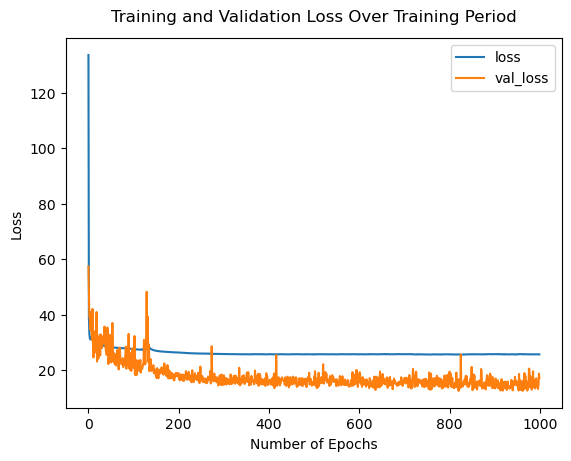

In [25]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

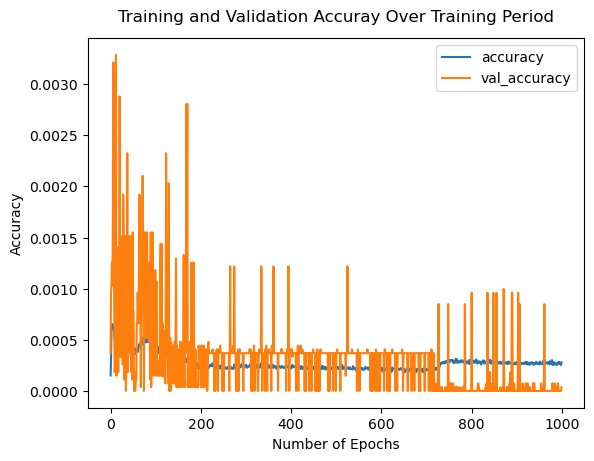

In [26]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.93463, st_er: 0.001739
y = 0.7524*x + 1.0838


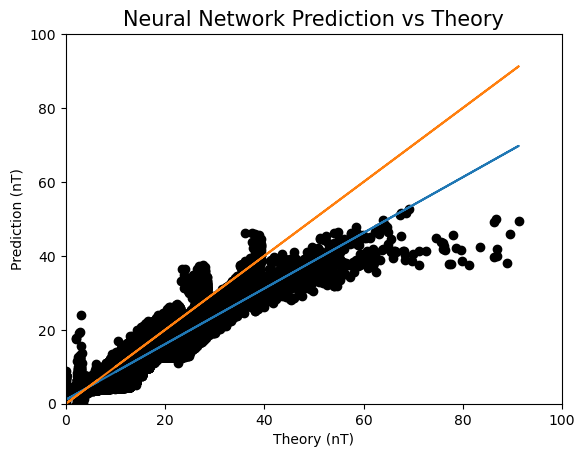

In [27]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [28]:
test_pred = model.predict(X4_pred)

847/847 [==============================] - 1s 698us/step


In [29]:
df4_pred['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_61444/2364276288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_pred['predict'] = test_pred


In [30]:
df4_pred

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,predict
936040,36,6,8,33,40,-281.228516,-281.580200,-298.687897,-313.737274,-312.011200,6.323732,7.931940
936041,36,6,8,33,41,-470.337860,-472.075500,-488.780823,-502.790314,-501.399567,5.692159,4.657013
936042,36,6,8,33,42,-681.214478,-683.935608,-700.522400,-713.198364,-711.765076,5.156662,4.378033
936043,36,6,8,33,43,-892.559753,-896.184509,-911.637207,-924.472595,-923.017944,4.694756,4.249091
936079,36,6,8,34,15,-1471.209351,-1475.378540,-1489.757202,-1499.828979,-1503.126099,3.883065,3.941764
...,...,...,...,...,...,...,...,...,...,...,...,...
1046804,36,6,35,36,20,-610.252991,-613.019775,-628.576294,-640.380493,-640.784180,6.022675,4.414029
1046805,36,6,35,36,21,-460.002319,-461.472900,-478.441254,-491.319244,-490.660767,6.719324,4.870338
1046806,36,6,35,36,22,-321.722260,-321.674591,-340.263275,-354.678894,-352.521301,7.573551,7.610266
1046807,36,6,35,36,23,-196.516602,-195.509140,-214.553329,-230.615768,-227.110611,8.658540,9.551573


In [31]:
df_test

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
901120,36,6,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
901121,36,6,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
901122,36,6,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
901123,36,6,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
901124,36,6,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1081339,36,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
1081340,36,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
1081341,36,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
1081342,36,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_test['predict'] = 0.00

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_61444/3257651465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = 0.00


In [33]:
df_out = df_test[['i', 'j', 'k', 'predict']]
df_pre = df4_pred[['i', 'j', 'k', 'predict']]

In [34]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180224 entries, 901120 to 1081343
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   i        180224 non-null  int64  
 1   j        180224 non-null  int64  
 2   k        180224 non-null  int64  
 3   predict  180224 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 6.9 MB


In [35]:
for x in range(len(df_pre)):
    i = df_pre.iloc[x, :]['i'].astype(int)
    j = df_pre.iloc[x, :]['j'].astype(int)
    k = df_pre.iloc[x, :]['k'].astype(int)
    pred = df_pre.iloc[x, :]['predict']
    idx = df_out[(df_out['i']==i) & (df_out['j']==j) & (df_out['k']==k)].index
    df_out.loc[idx, 'predict']= pred

In [36]:
df_pre

,i,j,k,predict
936040,8,33,40,7.931940
936041,8,33,41,4.657013
936042,8,33,42,4.378033
936043,8,33,43,4.249091
936079,8,34,15,3.941764
...,...,...,...,...
1046804,35,36,20,4.414029
1046805,35,36,21,4.870338
1046806,35,36,22,7.610266
1046807,35,36,23,9.551573


In [37]:
df_out[(df_out['i']==7) & (df_out['j']==32) & (df_out['k']==40)]

,i,j,k,predict
931880,7,32,40,0.0


In [38]:
df_out

,i,j,k,predict
901120,0,0,0,0.0
901121,0,0,1,0.0
901122,0,0,2,0.0
901123,0,0,3,0.0
901124,0,0,4,0.0
...,...,...,...,...
1081339,43,63,59,0.0
1081340,43,63,60,0.0
1081341,43,63,61,0.0
1081342,43,63,62,0.0


In [39]:
np.savetxt(img_path+"nn_nonzero_32to38_3layer5unit_1000_erode.txt", df_out[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")